In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from tqdm import tqdm
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported f

In [2]:
from google.colab import files
files.upload()

Saving diabetes.zip to diabetes.zip


{'diabetes.zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\xb4mNQ$\xe7\xa3\x0bN\x00\x00\x00[\x00\x00\x00\x1e\x00\x00\x00diabetes/sample_submission.csv\x1d\xcb\xb1\r\x800\x0c\x05\xd1\x1e\x89MR\xf0m\xc7&C0\x03\x02\xe2"M\x90 \xec\x0f\xa4|:\x9d\xd7\xe3|j\xf3k-9\xe4\xb2\xed\xde\xfc^<\x8f\x03lN&FS\xc0\x07\x80\x18\xaa\xda\xc1b\x11J\xf2\x83\xa2 \xa9r/\xc2\xa40\x8b\xfdy\x01PK\x03\x04\x14\x00\x00\x00\x08\x00\xc7fPQ\xbc\xbd\xaei*\xf7\x01\x00\x93v\x07\x00\x11\x00\x00\x00diabetes/test.csv\x9c\xbd[\xcf%\xc7\x91$\xf8\xbe\xc0\xfe\x90\x06\x0e\xd5q\xbf\x00\r\x15$\x8a\xd3\x9a\x07^\xd0R\xd7>\xf4C\xa3\x86\xaam\x16 \x91\x02Y\xec\x81\xfe\xfd\x9ayD\xe4\xc9\x8c\xf0\xc8\xf3\xcdJ*\xd6G\xb1x\xf2d\\\xdc\xcd\xdd\xcd\xcd?\xfe\xf8\xfdO\xbf\xfe\xf8\xf9\xe3\xcf\xff\xf9\xe9/\x8f\xbf\x7f\xf8\xfc\xe9\xe3\x8f\x9f\xf9\xe3\xcf\x1f\xbe\xff\xf8\xf8\xaf\x8f?\xfe\xe5\xe3\xcf\x8f\x0f\xff\xf5\xf1\xf1\xbf?~\xfa\xaf\x1f>?>\xfc\xe5o\x9f~\xf9\xe5\xd3O?\xfe\xe7\xe7\x7f\xfc\xfd#\xff\xe0_>\xfd\xf2\xfd\x0f\x1f~\xfe\xaf\x8f\xff\x89\x9f\xfe\xfe\

In [3]:
import os
cwd=os.getcwd()
print('cwd:',cwd)

cwd: /content


In [4]:
!unzip diabetes.zip -d diabetes

Archive:  diabetes.zip
  inflating: diabetes/diabetes/sample_submission.csv  
  inflating: diabetes/diabetes/test.csv  
  inflating: diabetes/diabetes/train.csv  


In [5]:
ss = pd.read_csv('/content/diabetes/diabetes/sample_submission.csv')
train=pd.read_csv('/content/diabetes/diabetes/train.csv')
test=pd.read_csv('/content/diabetes/diabetes/test.csv')


# **Data Description**

The Problem Statement here is, to identify if the patient will again come back for medication or not, based on the the mentioned feature variables which are described as below.

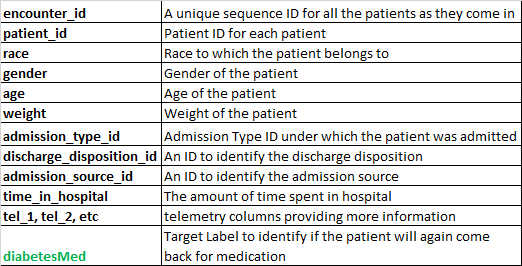

1. We can see that there are about 15+ variables(considering extra telemetry variables) which can be used for modelling.
2. Variable encounter_id is an identifier column. It has a unique value for every sample in the data set and cannot be used for modelling.
3. Variable 'diabetesMed' is Target/y column. It has binary values and we need to predict this variable given 15+ variables as features.

# **HYPOTHESIS GENERATION**

Simply put, a hypothesis is a possible view or assertion of an analyst about the problem he or she is working upon. It may be true or may not be true.

1. Are older patients more likely to take medication as compared to younger patients ?
2. Are patients with certain Race affect the medication?
3. Does weight of the patient affect the medication?
4. Does admission type id affect the medication?
5. Does discharge disposition id affect the medication?
6. Does admission source id  affect the medication?
7. Does time in hospital affect the medication?


# **EDA**

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.

We have been provided a file, with information:

**Train.csv:** We will use this file for training our model. It contains variables or features that we will input to our model, and the target variable that we want to predict.

We will split the data into Train data set, Cross validation data set and Test data set and perform the job.


Now lets go ahead and check the data we have

**1. Brief look at the dataset.**

In [6]:
train.head(3)
test.head(3)

,encounter_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_1,tel_2,tel_3,tel_4,tel_9,tel_10,tel_11,tel_13,tel_14,tel_15,tel_48,tel_49,diabetesMed
0,178974720,61754247,Caucasian,Male,[80-90),?,1,3,7,6,MC,InternalMedicine,61,0,780,276,789,None,None,No,Ch,>30,1
1,111231666,110498427,AfricanAmerican,Female,[50-60),?,3,1,1,2,BC,Orthopedics,32,1,727,786,401,None,None,No,No,NO,1
2,134751624,91719990,Caucasian,Male,[80-90),?,1,1,7,5,MC,?,85,2,486,V45,585,None,None,No,Ch,>30,1


,encounter_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_1,tel_2,tel_3,tel_4,tel_9,tel_10,tel_11,tel_13,tel_14,tel_15,tel_48,tel_49
0,379094480,161159387,Caucasian,Female,[40-50),?,1,7,7,1,MC,Emergency/Trauma,2,0,301,340,293,None,None,No,Ch,NO
1,396700076,131511695,AfricanAmerican,Female,[50-60),?,3,1,1,3,MC,?,13,1,403,585,250.6,None,None,No,Ch,NO
2,329607638,151068461,Caucasian,Male,[90-100),?,1,3,7,14,MC,?,81,3,250.7,518,459,None,None,No,Ch,NO


In [7]:
ID_COL, TARGET_COL = 'encounter_id	', 'diabetesMed'

**2. Dataset Shape (Number of Samples and Variables in the dataset)**

In [8]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')

features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 10000 samples and 23 variables

Test contains 4696 samples and 22 variables

The dataset contains 22 features


**3. Target Distribution**

This is a binary classification problem. Lets have a look at the number of positive and negative examples that we have, or in our problem statement terms: 'Number of People who came back for medication, and number of people who did not'

In [ ]:
train[TARGET_COL].value_counts(normalize=True)

1    0.899
0    0.101
Name: diabetesMed, dtype: float64

Visually we are able to see communicate things more clearly and graphs help us do that. Lets visualize the same target distribution in a countplot.

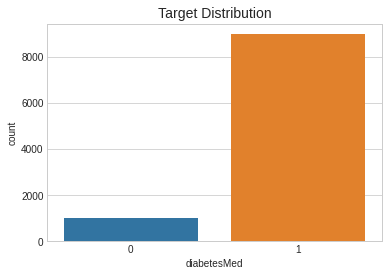

In [ ]:
_ = sns.countplot(train[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

Quite obviously dataset is very imbalanced. About 89% of the examples are positive, and only 11% are negative.

**4. Variable Datatypes**

Lets have a look at the kind of data types that is being used to store the variables in pandas.

pandas info() method on dataframe allows to do that. For each variable we can see the number of non-null values along with their datatypes.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              10000 non-null  int64 
 1   patient_id                10000 non-null  int64 
 2   race                      10000 non-null  object
 3   gender                    10000 non-null  object
 4   age                       10000 non-null  object
 5   weight                    10000 non-null  object
 6   admission_type_id         10000 non-null  int64 
 7   discharge_disposition_id  10000 non-null  int64 
 8   admission_source_id       10000 non-null  int64 
 9   time_in_hospital          10000 non-null  int64 
 10  tel_1                     10000 non-null  object
 11  tel_2                     10000 non-null  object
 12  tel_3                     10000 non-null  int64 
 13  tel_4                     10000 non-null  int64 
 14  tel_9                  

Looks like we have a mixture of datatypes, a lot of these variables are object datatypes. Object datatypes are used to store strings along with other non-numeric data. This is obvious since we encountered a lot of strings when we had a look at the dataset.

Machine Learning Models understand only numbers so we will have to later convert these strings to numbers

**5. Null Values**

Although the info() function did tell us about non-null values ideally we want to have a look at the percentage of null values in each variable.

In [ ]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

diabetesMed                 0.0
tel_1                       0.0
patient_id                  0.0
race                        0.0
gender                      0.0
age                         0.0
weight                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
tel_2                       0.0
tel_49                      0.0
tel_3                       0.0
tel_4                       0.0
tel_9                       0.0
tel_10                      0.0
tel_11                      0.0
tel_13                      0.0
tel_14                      0.0
tel_15                      0.0
tel_48                      0.0
encounter_id                0.0
dtype: float64

we see that there is no record which has null data, which is good, but lets see each of the individual column and check out the data

**6. Unique values in each variable**

In [ ]:
train.nunique()

encounter_id                10000
patient_id                  9137 
race                        6    
gender                      2    
age                         10   
weight                      9    
admission_type_id           8    
discharge_disposition_id    20   
admission_source_id         15   
time_in_hospital            14   
tel_1                       17   
tel_2                       47   
tel_3                       102  
tel_4                       7    
tel_9                       459  
tel_10                      452  
tel_11                      476  
tel_13                      4    
tel_14                      4    
tel_15                      4    
tel_48                      2    
tel_49                      3    
diabetesMed                 2    
dtype: int64

The numerical features 'encounter_id', 'patient_id', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital' contain a lot of unique values which is quite obvious.

For other categorical features, we see lesser values

**Analyzing Each Variable & their relationships**

There are two types of features that we have:

1. Categorical
2. Numerical
Also our target is Binary

For each feature type we will be perform two types of analysis:

1. Univariate: Analyze 1 feature at a time

2. Bivariate: Analyze the relationship of that feature with target variable, i.e. 'diabetesMed'

But before jumping straight into analysis, lets have a look at the variables we had and try to ask some questions ourselves

In [ ]:
train.columns

Index(['encounter_id', 'patient_id', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'tel_1', 'tel_2', 'tel_3', 'tel_4', 'tel_9',
       'tel_10', 'tel_11', 'tel_13', 'tel_14', 'tel_15', 'tel_48', 'tel_49',
       'diabetesMed'],
      dtype='object')

# **Segregating Categorical & Numerical Variables**

In [9]:
cat_cols = ['race',
 'gender',
 'age',
 'weight',
 'tel_1',
 'tel_2',
 'tel_9',
 'tel_10',
 'tel_11',
 'tel_13','tel_14','tel_15','tel_48','tel_49'
 ]

In [10]:
num_cols = [c for c in features if c not in cat_cols]
num_cols

['encounter_id',
 'patient_id',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'tel_3',
 'tel_4']

**Categorical Features**

*Univariate Analysis - Pie Charts.*

Pie Charts can be useful in seeing the proportion of samples, that fall into each category of a categorical variable. For each of the categorical variables we will make a pie chart.

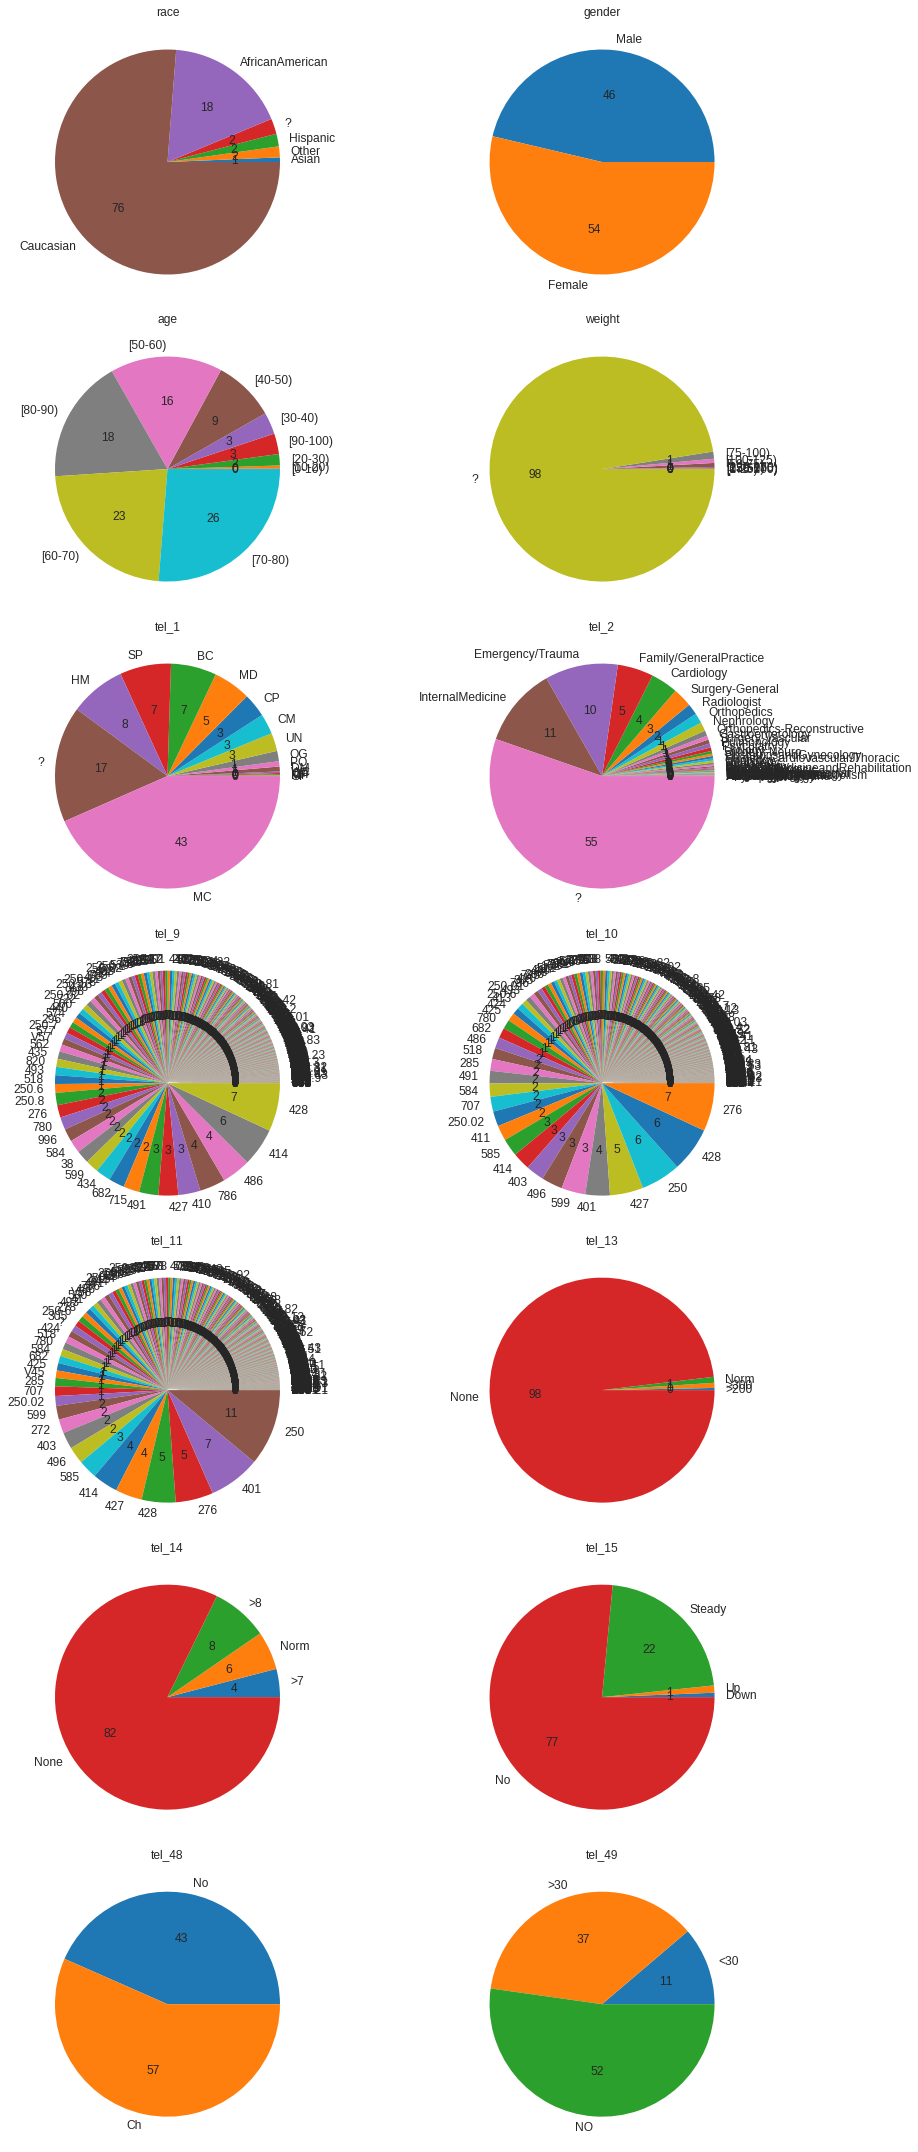

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(15, 30))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

So **below are the inferences** we get from the pie chart

1. Race column has about 2 % records with '?' values 
2. Weight column has about 98% records with '?' values 
3. tel_1 column has about 17 % records with '?' values 
4. tel_2 column has about 55 % records with '?' values 


# **Univariate Analysis - CountPlots**

Another way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable

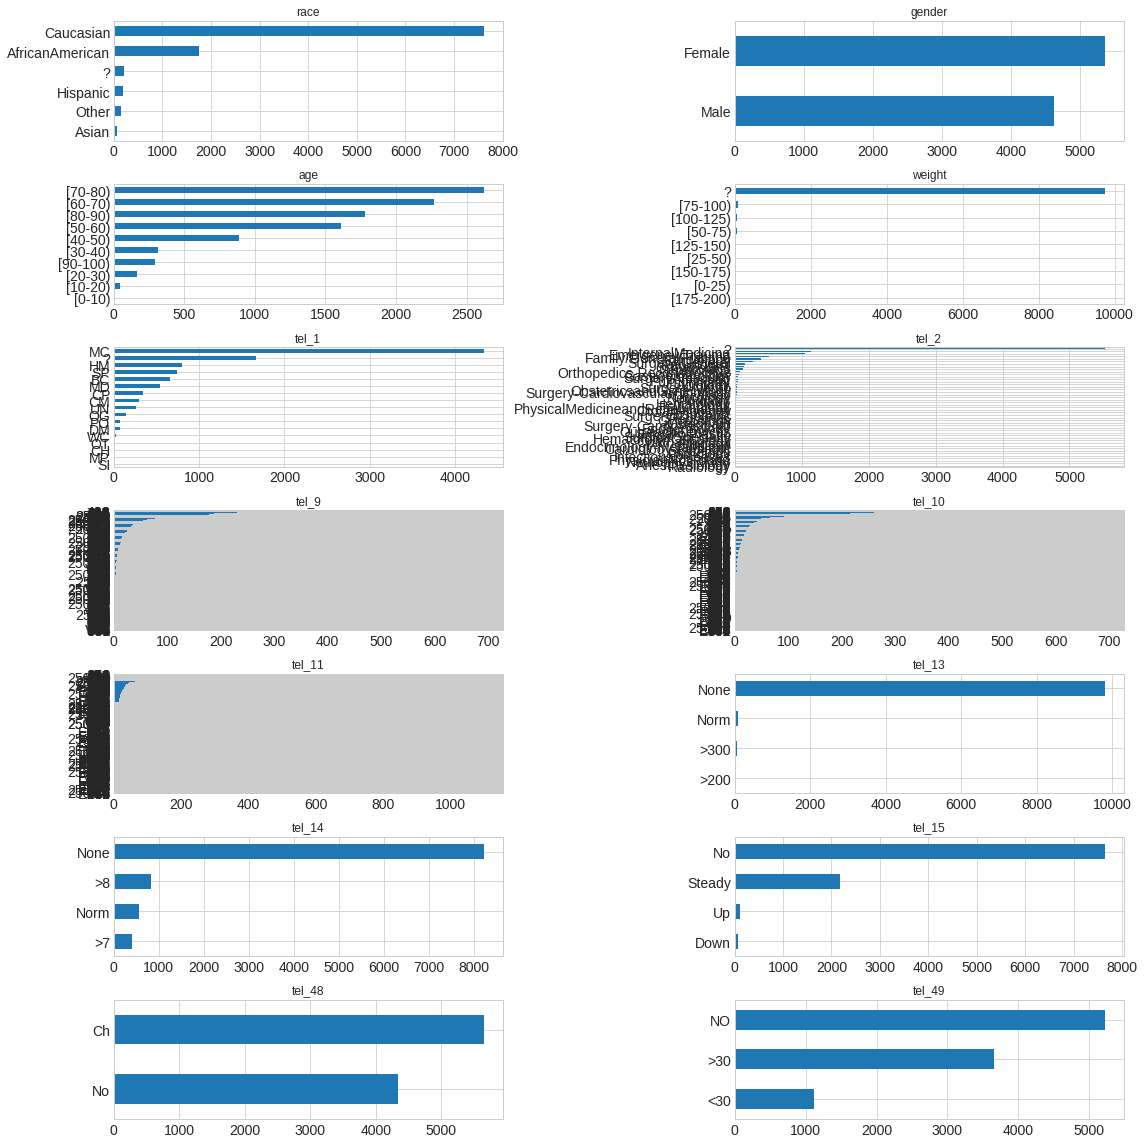

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

1. So it looks like we can drop the columns Weight and tel_2(contains more than 20% data with nulls) as they might not add any value to our model.

2. And for the remaining columns we will replace '?' value with 'UNKNOWN' value.

**Displaying all the Unique values to better understand the data**

In [ ]:

#List of unique values in each column
r,c = train.shape
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None
pd.options.display.max_rows = None
cols_lst=[]
unique_vals_lst=[]
cols=train.columns
print('Total rows in dataset:',r)
for col in cols:
    unique_values=train[col].unique()
    cols_lst.append(col)
    if len(unique_values) < 100:
        unique_vals_lst.append(unique_values)
    else:
        unique_vals_lst.append('More than 100 unique values')
df_unique_values=pd.DataFrame({'Columns':cols_lst,'Unique values':unique_vals_lst})
df_unique_values=df_unique_values.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])

df_unique_values

Total rows in dataset: 10000


,Columns,Unique values
0,encounter_id,More than 100 unique values
1,patient_id,More than 100 unique values
2,race,['Caucasian' 'AfricanAmerican' 'Asian' '?' 'Hispanic' 'Other']
3,gender,['Male' 'Female']
4,age,['[80-90)' '[50-60)' '[70-80)' '[30-40)' '[60-70)' '[40-50)' '[10-20)' '[20-30)' '[90-100)' '[0-10)']
5,weight,['?' '[25-50)' '[50-75)' '[75-100)' '[125-150)' '[100-125)' '[150-175)' '[0-25)' '[175-200)']
6,admission_type_id,[1 3 2 5 8 6 4 7]
7,discharge_disposition_id,[ 3 1 23 6 5 2 13 22 7 4 11 14 18 28 24 15 8 9 25 19]
8,admission_source_id,[ 7 1 5 4 6 17 2 10 3 14 22 9 11 8 25]
9,time_in_hospital,[ 6 2 5 3 8 1 9 4 13 10 11 7 14 12]


**Replacing '?' with 'UNKNOWN' value and checking the percentage of nulls**

In [11]:
train.replace('?','UNKNOWN',inplace=True)
test.replace('?','UNKNOWN',inplace=True)

so we see that there are couple of columns which contain more than 15% records with nulls, hence dropping weight and tel_2 columns from DataFrame

# **6. Pre-Processing and Transformation of data for few columns for better modelling**

we will be transforming the data for few telemetry columns, and dropping the columns which are having > 15% of data

In [12]:
train.head(2)
test.head(2)

,encounter_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_1,tel_2,tel_3,tel_4,tel_9,tel_10,tel_11,tel_13,tel_14,tel_15,tel_48,tel_49,diabetesMed
0,178974720,61754247,Caucasian,Male,[80-90),UNKNOWN,1,3,7,6,MC,InternalMedicine,61,0,780,276,789,None,None,No,Ch,>30,1
1,111231666,110498427,AfricanAmerican,Female,[50-60),UNKNOWN,3,1,1,2,BC,Orthopedics,32,1,727,786,401,None,None,No,No,NO,1


,encounter_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_1,tel_2,tel_3,tel_4,tel_9,tel_10,tel_11,tel_13,tel_14,tel_15,tel_48,tel_49
0,379094480,161159387,Caucasian,Female,[40-50),UNKNOWN,1,7,7,1,MC,Emergency/Trauma,2,0,301,340,293,None,None,No,Ch,NO
1,396700076,131511695,AfricanAmerican,Female,[50-60),UNKNOWN,3,1,1,3,MC,UNKNOWN,13,1,403,585,250.6,None,None,No,Ch,NO


**Checking if the value replacements happened properly**

In [13]:
unique_races = train['race'].value_counts()
print('Number of Unique races :', unique_races.shape[0])
# the top 10 genes that occured most
print(unique_races.head(10))

Number of Unique races : 6
Caucasian          7623
AfricanAmerican    1752
UNKNOWN            221 
Hispanic           181 
Other              157 
Asian              66  
Name: race, dtype: int64


In [ ]:
unique_tel_1 = train['tel_1'].value_counts()
print('Number of Unique tel_1 :', unique_tel_1.shape[0])
# the top 10 genes that occured most
print(unique_tel_1.head(20))

Number of Unique tel_1 : 17
MC         4341
UNKNOWN    1669
HM          804
SP          736
BC          655
MD          542
CP          340
CM          292
UN          261
OG          148
PO           76
DM           70
WC           22
OT           16
CH           14
MP            8
SI            6
Name: tel_1, dtype: int64


In [14]:
train = train.drop(['weight','tel_2'],axis=1)
test = test.drop(['weight','tel_2'],axis=1)

Transforming Age and telemetry column for better results

In [15]:
def func_age(row):
    if (row['age']=='[0-10)'):
        val='below_10'
    elif (row['age']=='[10-20)'):
        val='from_10_to_20'
    elif (row['age']=='[20-30)'):
        val='from_20_to_30'
    elif (row['age']=='[30-40)'):
        val='from_30_to_40'
    elif (row['age']=='[40-50)'):
        val='from_40_to_50'
    elif (row['age']=='[50-60)'):
        val='from_50_to_60'
    elif (row['age']=='[60-70)'):
        val='from_60_to_70'
    elif (row['age']=='[70-80)'):
        val='from_70_to_80'
    elif (row['age']=='[80-90)'):
        val='from_80_to_90'
    else:
        val='from_90_to_100'
    return val

def func_tel_13(row):
    if (row['tel_13']=='>300'):
        val='greater_than_300'
    elif (row['tel_13']=='>200'):
        val='greater_than_200'
    elif (row['tel_13']=='Norm'):
        val='Norm'
    elif (row['tel_13']=='None'):
        val='None'
    else:
        val='UNKNOWN'
    return val

def func_tel_14(row):
    if (row['tel_14']=='>8'):
        val='greater_than_8'
    elif (row['tel_14']=='>7'):
        val='greater_than_7'
    elif (row['tel_14']=='Norm'):
        val='Norm'
    elif (row['tel_14']=='None'):
        val='None'
    else:
        val='UNKNOWN'
    return val

def func_tel_49(row):
    if (row['tel_49']=='>30'):
        val='greater_than_30'
    elif (row['tel_49']=='<30'):
        val='less_than_30'
    elif (row['tel_49']=='NO'):
        val='NO'
    else:
        val='UNKNOWN'
    return val          


In [16]:
train['age']=train.apply(func_age,axis=1)
test['age']=test.apply(func_age,axis=1)

train['tel_13']=train.apply(func_tel_13,axis=1)
test['tel_13']=test.apply(func_tel_13,axis=1)

train['tel_14']=train.apply(func_tel_14,axis=1)
test['tel_14']=test.apply(func_tel_14,axis=1)

train['tel_49']=train.apply(func_tel_49,axis=1)
test['tel_49']=test.apply(func_tel_49,axis=1)

**Checking if the value transformations happened properly for the above columns**

In [17]:
train.head(5)
test.head(5)

,encounter_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_1,tel_3,tel_4,tel_9,tel_10,tel_11,tel_13,tel_14,tel_15,tel_48,tel_49,diabetesMed
0,178974720,61754247,Caucasian,Male,from_80_to_90,1,3,7,6,MC,61,0,780,276,789,None,None,No,Ch,greater_than_30,1
1,111231666,110498427,AfricanAmerican,Female,from_50_to_60,3,1,1,2,BC,32,1,727,786,401,None,None,No,No,NO,1
2,134751624,91719990,Caucasian,Male,from_80_to_90,1,1,7,5,MC,85,2,486,V45,585,None,None,No,Ch,greater_than_30,1
3,254196636,1897758,Caucasian,Female,from_70_to_80,3,1,1,3,UNKNOWN,24,2,715,250,272,None,None,No,Ch,greater_than_30,1
4,432617750,34636617,Asian,Female,from_80_to_90,2,3,5,2,MC,1,2,784,790,294,None,None,No,No,NO,1


,encounter_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_1,tel_3,tel_4,tel_9,tel_10,tel_11,tel_13,tel_14,tel_15,tel_48,tel_49
0,379094480,161159387,Caucasian,Female,from_40_to_50,1,7,7,1,MC,2,0,301,340,293,None,None,No,Ch,NO
1,396700076,131511695,AfricanAmerican,Female,from_50_to_60,3,1,1,3,MC,13,1,403,585,250.6,None,None,No,Ch,NO
2,329607638,151068461,Caucasian,Male,from_90_to_100,1,3,7,14,MC,81,3,250.7,518,459,None,None,No,Ch,NO
3,150581694,59077494,Caucasian,Male,from_70_to_80,1,11,7,6,MC,51,6,801,780,496,None,None,No,No,NO
4,298340864,105413346,Caucasian,Male,from_40_to_50,1,1,7,1,DM,34,0,250.6,305,782,None,None,No,No,NO


In [18]:
train.shape
test.shape

(10000, 21)

(4696, 20)

In [19]:
ID_COL, TARGET_COL = 'encounter_id	', 'diabetesMed'

In [20]:
cat_cols = [
            'race',
 'gender',
 'age',
 'tel_1',
 'tel_9',
 'tel_10',
 'tel_11',
 'tel_13','tel_14','tel_15','tel_48','tel_49'
 ]
cat_cols

['race',
 'gender',
 'age',
 'tel_1',
 'tel_9',
 'tel_10',
 'tel_11',
 'tel_13',
 'tel_14',
 'tel_15',
 'tel_48',
 'tel_49']

In [21]:
features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
num_cols = [c for c in features if c not in cat_cols]
#removing ID columns from the list of numerical features
num_cols = [ele for ele in num_cols if ele not in ['encounter_id','patient_id'] ]
num_cols

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'tel_3',
 'tel_4']

# **Bivariate Analysis Relationships with Target**

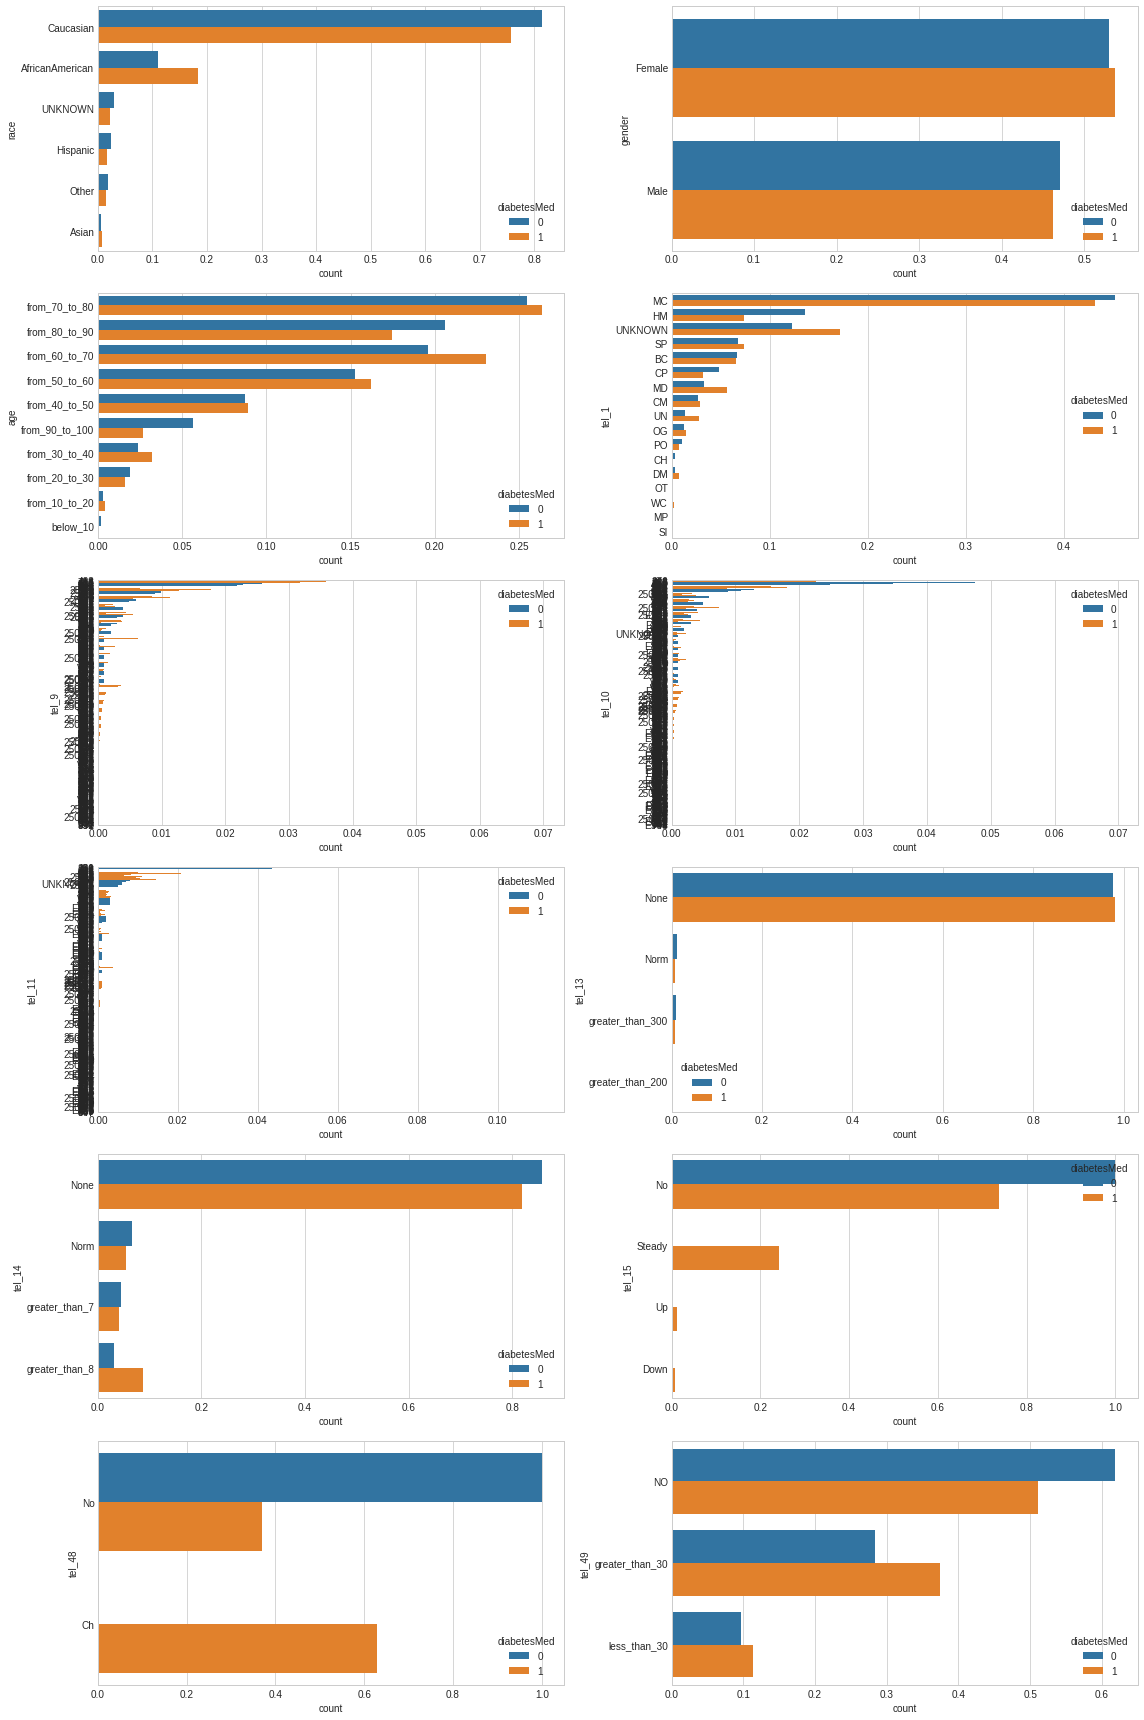

In [ ]:

fig, axes = plt.subplots(6, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    fltr = train[TARGET_COL] == 0
    vc_a = train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[TARGET_COL] = 0
    vc_b[TARGET_COL] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=TARGET_COL, ax=axes[i])
    
_ = plt.tight_layout()

**Q:** Are Older patients more likely to take medication as compared to younger patients?

**A:** From the above bar plots we see that patients above 50 are more prone to medication

**Q:** Are patients with certain race affect with medication?

**A:** we see that AfricanAmerican get affected more, next comes asian population. Caucasians and hispancis are not much affected from the insights we see(volume of data for them is huge).

**Numerical Features**

***1. Univariate Analysis - Boxplots***

Boxplot can be used to see the spread of the numerical variables, and identify outliers

https://en.wikipedia.org/wiki/Box_plot

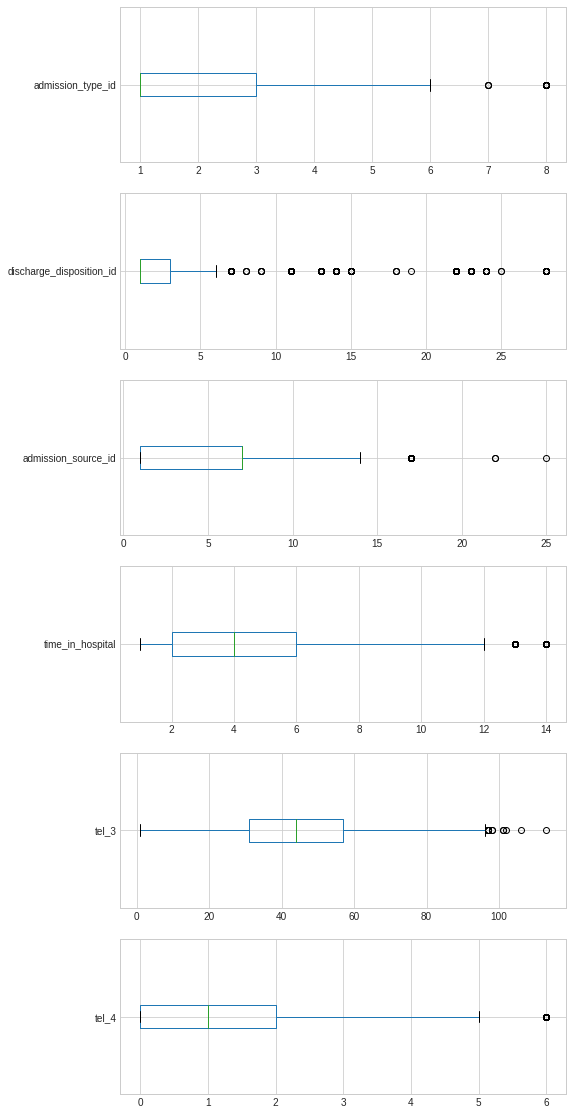

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

***2. Univariate Analysis - Density Plots***

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

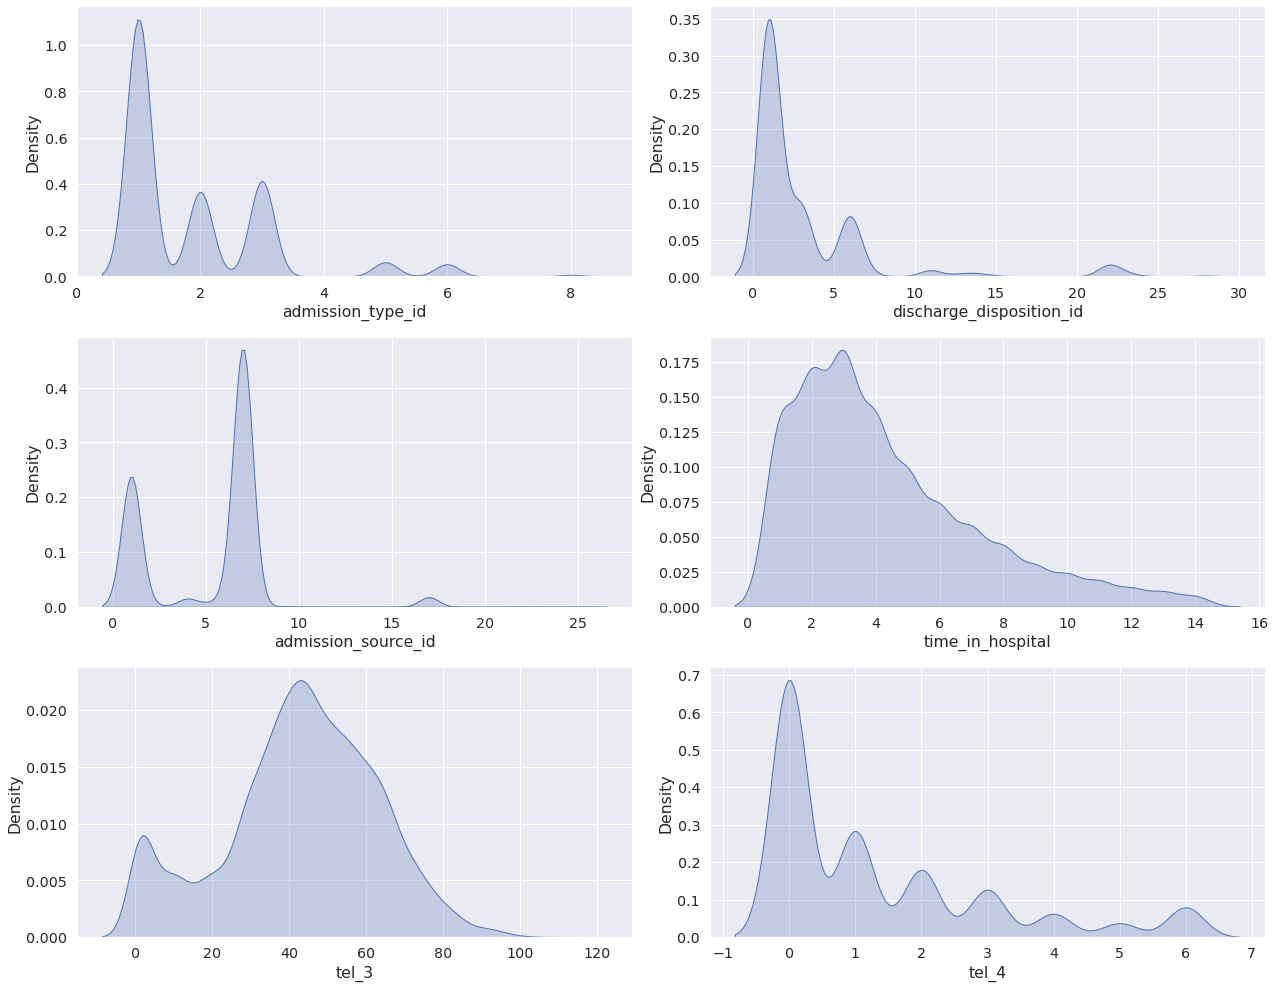

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

***3. Bivariate Analysis KDE plots - Relationships with Target Variable.***

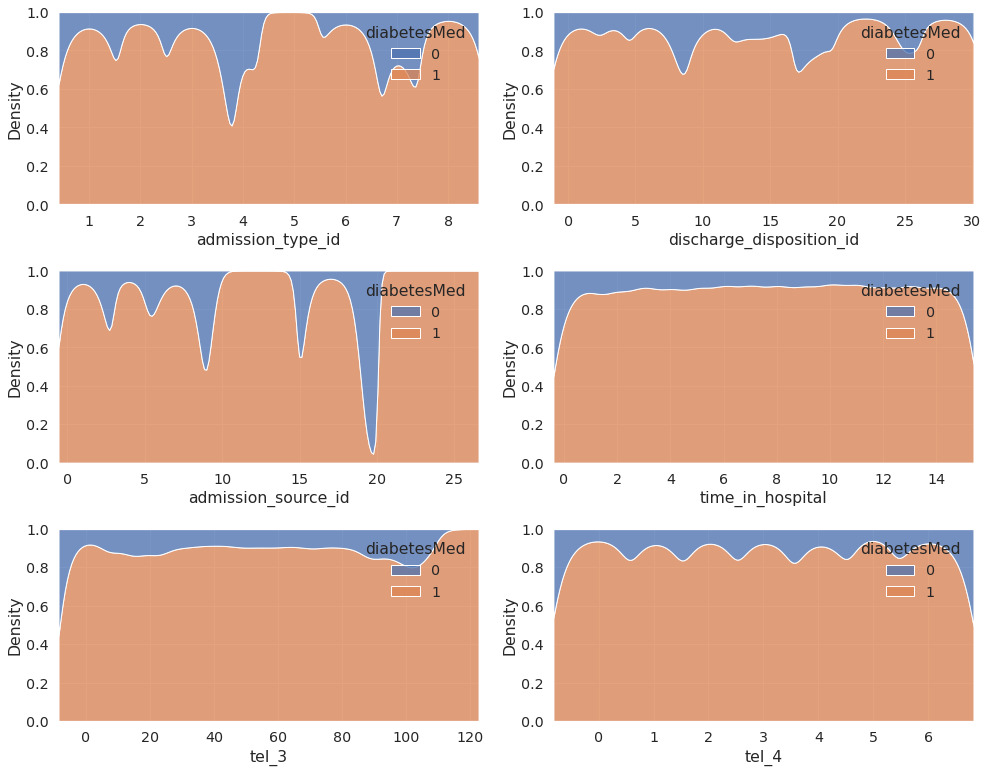

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(14, 11))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

***4. Bivariate Analysis - Horizontal BarPlots***

For each numerical Variable. We will plot the median of the numerical variable for:

When diabetesMed == 0
when diabetesMed == 1
We are choosing median since median is not affected by outliers, and our data has a lot of outliers

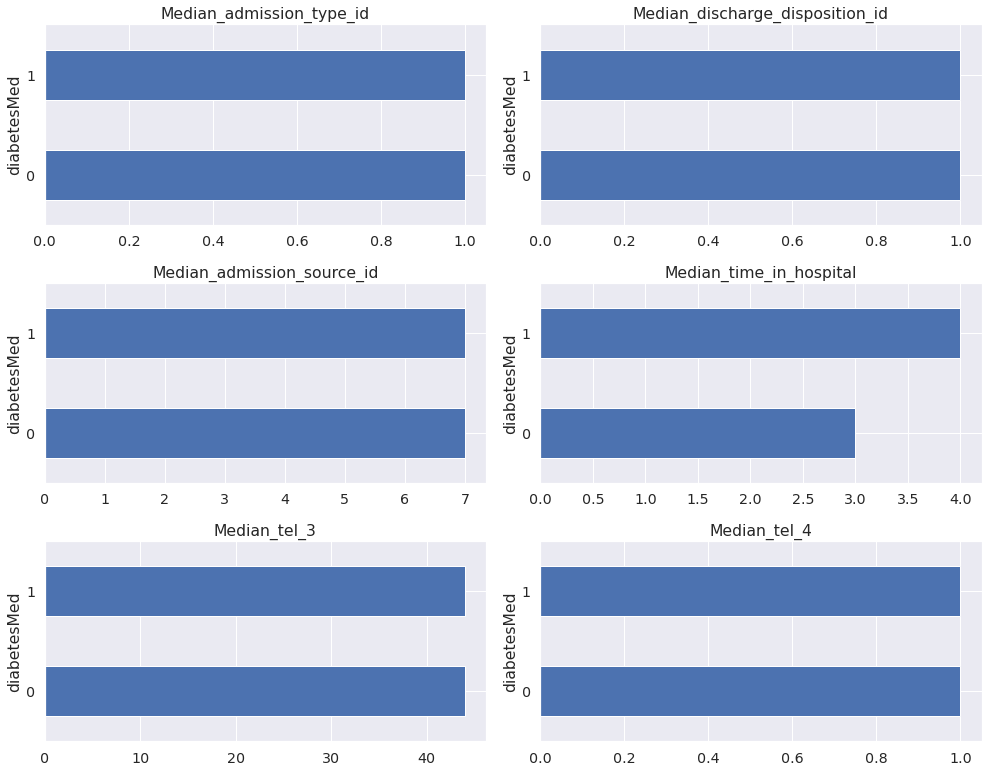

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(14, 11))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = train.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()

**Q:** Does admission Type id affect the medication?

**A:** No it does not as per the insights from the graph

**Q:** Does discharge disposition id affect the medication?

**A:** No it does not as per the insights from the graph

**Q:** Does admission source id affect the medication?

**A:** No it does not as per the insights from the graph

**Q:** Does time in hospital affect the medication?

**A:** Yes it does, as it is showing that people who spend more time in hospital are more likely to comeback for medication

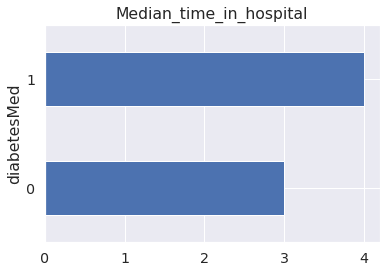

In [ ]:
_ = train.groupby(TARGET_COL)['time_in_hospital'].median().plot(kind = 'barh', title=f'Median_time_in_hospital')

**5. Bivariate Analysis - Correlation Heatmaps**

<Figure size 1008x576 with 0 Axes>

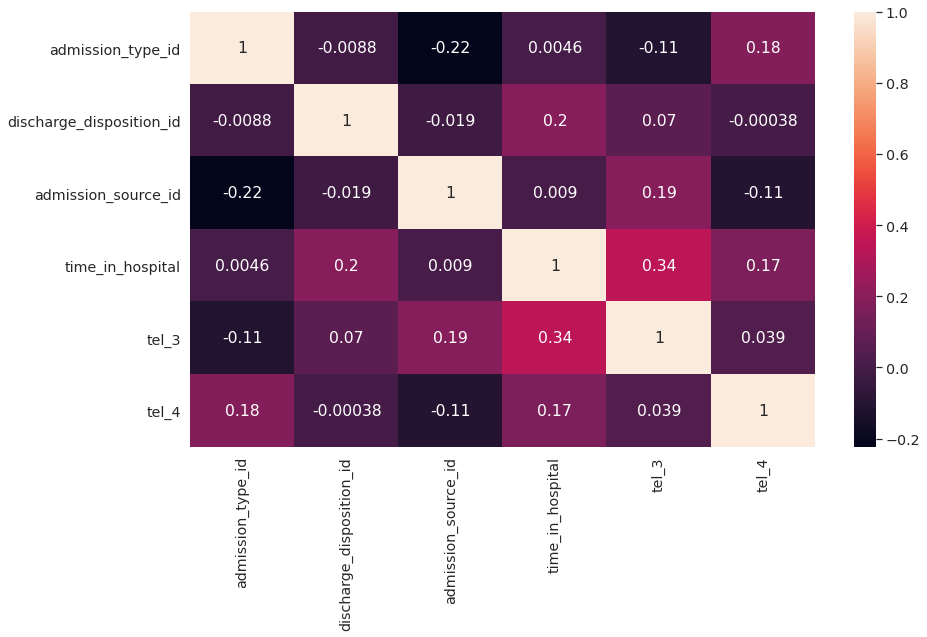

In [ ]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

# **Splitting data into Train and cross validation(or test): Stratified Sampling**

In [22]:
y = train['diabetesMed'].values
X = train.drop(['diabetesMed'], axis=1)

In [23]:
X.head(10)

,encounter_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_1,tel_3,tel_4,tel_9,tel_10,tel_11,tel_13,tel_14,tel_15,tel_48,tel_49
0,178974720,61754247,Caucasian,Male,from_80_to_90,1,3,7,6,MC,61,0,780,276,789,None,None,No,Ch,greater_than_30
1,111231666,110498427,AfricanAmerican,Female,from_50_to_60,3,1,1,2,BC,32,1,727,786,401,None,None,No,No,NO
2,134751624,91719990,Caucasian,Male,from_80_to_90,1,1,7,5,MC,85,2,486,V45,585,None,None,No,Ch,greater_than_30
3,254196636,1897758,Caucasian,Female,from_70_to_80,3,1,1,3,UNKNOWN,24,2,715,250,272,None,None,No,Ch,greater_than_30
4,432617750,34636617,Asian,Female,from_80_to_90,2,3,5,2,MC,1,2,784,790,294,None,None,No,No,NO
5,139109832,24224814,AfricanAmerican,Female,from_80_to_90,1,23,7,3,MC,39,2,440,401,250,None,None,No,Ch,NO
6,290639712,88293528,AfricanAmerican,Female,from_70_to_80,3,3,1,8,CM,61,3,182,196,276,None,None,No,Ch,less_than_30
7,266395878,40937094,Caucasian,Female,from_80_to_90,2,6,1,2,MC,12,0,434,331,780,None,None,No,Ch,NO
8,140215032,40962348,Caucasian,Female,from_30_to_40,3,1,1,5,SP,2,0,682,277,250,None,None,Steady,No,greater_than_30
9,124132824,24617979,AfricanAmerican,Female,from_50_to_60,1,1,7,3,BC,52,0,584,250.11,276,None,None,No,Ch,NO


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

**Make Data Model Ready: encoding numerical, categorical features**

*One Hot Encoding for race column*

In [25]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['race'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_race_ohe = vectorizer.transform(X_train['race'].values)
X_cv_race_ohe = vectorizer.transform(X_cv['race'].values)
X_test_race_ohe = vectorizer.transform(X_test['race'].values)

print("After vectorizations for : race")
print(X_train_race_ohe.shape, y_train.shape)
print(X_cv_race_ohe.shape, y_cv.shape)
print(X_test_race_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

Features_List= []
Features_List.extend(vectorizer.get_feature_names())
#print(Features_List)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

After vectorizations for : race
(4489, 6) (4489,)
(2211, 6) (2211,)
(3300, 6) (3300,)
['africanamerican', 'asian', 'caucasian', 'hispanic', 'other', 'unknown']


*One Hot Encoding for gender column*

In [26]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['gender'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_gender_ohe = vectorizer.transform(X_train['gender'].values)
X_cv_gender_ohe = vectorizer.transform(X_cv['gender'].values)
X_test_gender_ohe = vectorizer.transform(X_test['gender'].values)

print("After vectorizations for : gender")
print(X_train_gender_ohe.shape, y_train.shape)
print(X_cv_gender_ohe.shape, y_cv.shape)
print(X_test_gender_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Features_List= []
Features_List.extend(vectorizer.get_feature_names())
#print(Features_List)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

After vectorizations for : gender
(4489, 2) (4489,)
(2211, 2) (2211,)
(3300, 2) (3300,)
['female', 'male']


*One Hot Encoding for age column*

In [27]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['age'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_age_ohe = vectorizer.transform(X_train['age'].values)
X_cv_age_ohe = vectorizer.transform(X_cv['age'].values)
X_test_age_ohe = vectorizer.transform(X_test['age'].values)

print("After vectorizations for : age")
print(X_train_age_ohe.shape, y_train.shape)
print(X_cv_age_ohe.shape, y_cv.shape)
print(X_test_age_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Features_List= []
Features_List.extend(vectorizer.get_feature_names())
#print(Features_List)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

After vectorizations for : age
(4489, 10) (4489,)
(2211, 10) (2211,)
(3300, 10) (3300,)
['below_10', 'from_10_to_20', 'from_20_to_30', 'from_30_to_40', 'from_40_to_50', 'from_50_to_60', 'from_60_to_70', 'from_70_to_80', 'from_80_to_90', 'from_90_to_100']


*One Hot Encoding for tel_1 column*

In [28]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['tel_1'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tel_1_ohe = vectorizer.transform(X_train['tel_1'].values)
X_cv_tel_1_ohe = vectorizer.transform(X_cv['tel_1'].values)
X_test_tel_1_ohe = vectorizer.transform(X_test['tel_1'].values)

print("After vectorizations for : tel_1")
print(X_train_tel_1_ohe.shape, y_train.shape)
print(X_cv_tel_1_ohe.shape, y_cv.shape)
print(X_test_tel_1_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Features_List= []
Features_List.extend(vectorizer.get_feature_names())
#print(Features_List)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

After vectorizations for : tel_1
(4489, 17) (4489,)
(2211, 17) (2211,)
(3300, 17) (3300,)
['bc', 'ch', 'cm', 'cp', 'dm', 'hm', 'mc', 'md', 'mp', 'og', 'ot', 'po', 'si', 'sp', 'un', 'unknown', 'wc']


*One Hot Encoding for tel_9 column*

In [29]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['tel_9'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tel_9_ohe = vectorizer.transform(X_train['tel_9'].values)
X_cv_tel_9_ohe = vectorizer.transform(X_cv['tel_9'].values)
X_test_tel_9_ohe = vectorizer.transform(X_test['tel_9'].values)

print("After vectorizations for : tel_9")
print(X_train_tel_9_ohe.shape, y_train.shape)
print(X_cv_tel_9_ohe.shape, y_cv.shape)
print(X_test_tel_9_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Features_List= []
Features_List.extend(vectorizer.get_feature_names())
#print(Features_List)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

After vectorizations for : tel_9
(4489, 350) (4489,)
(2211, 350) (2211,)
(3300, 350) (3300,)
['01', '02', '03', '11', '112', '12', '13', '136', '141', '150', '151', '153', '154', '155', '156', '157', '162', '163', '171', '172', '174', '179', '182', '185', '187', '188', '189', '191', '192', '193', '195', '196', '197', '198', '200', '202', '203', '204', '21', '211', '212', '214', '218', '22', '220', '227', '233', '238', '241', '242', '250', '255', '262', '272', '273', '274', '275', '276', '278', '280', '281', '283', '284', '285', '287', '288', '289', '290', '291', '292', '294', '295', '296', '297', '298', '300', '303', '305', '307', '309', '31', '310', '311', '327', '331', '333', '337', '340', '345', '346', '348', '350', '354', '355', '358', '362', '363', '376', '38', '380', '386', '39', '398', '401', '402', '403', '404', '41', '410', '411', '413', '414', '415', '416', '417', '42', '420', '421', '423', '424', '425', '426', '427', '428', '431', '432', '433', '434', '435', '436', '437', '4

One Hot Encoding for tel_10 column

In [30]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['tel_10'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tel_10_ohe = vectorizer.transform(X_train['tel_10'].values)
X_cv_tel_10_ohe = vectorizer.transform(X_cv['tel_10'].values)
X_test_tel_10_ohe = vectorizer.transform(X_test['tel_10'].values)

print("After vectorizations for : tel_10")
print(X_train_tel_10_ohe.shape, y_train.shape)
print(X_cv_tel_10_ohe.shape, y_cv.shape)
print(X_test_tel_10_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Features_List= []
Features_List.extend(vectorizer.get_feature_names())
#print(Features_List)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

After vectorizations for : tel_10
(4489, 338) (4489,)
(2211, 338) (2211,)
(3300, 338) (3300,)
['01', '02', '03', '11', '112', '117', '12', '13', '130', '135', '138', '150', '151', '153', '155', '156', '157', '162', '174', '183', '185', '189', '192', '196', '197', '198', '199', '201', '202', '203', '204', '205', '208', '21', '214', '218', '22', '242', '244', '245', '246', '250', '253', '255', '263', '266', '270', '272', '274', '275', '276', '277', '278', '279', '280', '281', '282', '284', '285', '286', '287', '289', '290', '291', '292', '293', '294', '295', '296', '298', '300', '301', '303', '304', '305', '307', '311', '319', '327', '331', '332', '335', '337', '338', '34', '340', '342', '344', '345', '346', '348', '349', '357', '358', '359', '364', '365', '368', '376', '38', '386', '389', '394', '396', '397', '398', '40', '401', '402', '403', '404', '41', '410', '411', '412', '413', '414', '415', '416', '42', '423', '424', '425', '426', '427', '428', '43', '430', '431', '433', '434', '4

*One Hot Encoding for tel_11 column*

In [31]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['tel_11'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tel_11_ohe = vectorizer.transform(X_train['tel_11'].values)
X_cv_tel_11_ohe = vectorizer.transform(X_cv['tel_11'].values)
X_test_tel_11_ohe = vectorizer.transform(X_test['tel_11'].values)

print("After vectorizations for : tel_11")
print(X_train_tel_11_ohe.shape, y_train.shape)
print(X_cv_tel_11_ohe.shape, y_cv.shape)
print(X_test_tel_11_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Features_List= []
Features_List.extend(vectorizer.get_feature_names())
#print(Features_List)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

After vectorizations for : tel_11
(4489, 366) (4489,)
(2211, 366) (2211,)
(3300, 366) (3300,)
['01', '02', '03', '110', '111', '112', '12', '13', '132', '135', '138', '154', '157', '162', '163', '170', '173', '174', '185', '188', '189', '196', '197', '198', '199', '202', '203', '204', '211', '214', '218', '22', '236', '238', '241', '242', '244', '250', '251', '252', '253', '255', '259', '262', '263', '266', '270', '272', '274', '275', '276', '277', '278', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '298', '300', '301', '303', '304', '305', '307', '309', '311', '312', '319', '323', '327', '331', '332', '335', '336', '337', '338', '34', '340', '342', '344', '345', '346', '348', '356', '357', '358', '362', '376', '379', '38', '380', '382', '383', '386', '388', '396', '397', '401', '402', '403', '404', '41', '410', '411', '412', '413', '414', '415', '416', '42', '423', '424', '425', '426', '427', '428', '429', '43',

*One Hot Encoding for tel_13 column*

In [32]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['tel_13'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tel_13_ohe = vectorizer.transform(X_train['tel_13'].values)
X_cv_tel_13_ohe = vectorizer.transform(X_cv['tel_13'].values)
X_test_tel_13_ohe = vectorizer.transform(X_test['tel_13'].values)

print("After vectorizations for : tel_13")
print(X_train_tel_13_ohe.shape, y_train.shape)
print(X_cv_tel_13_ohe.shape, y_cv.shape)
print(X_test_tel_13_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Features_List= []
Features_List.extend(vectorizer.get_feature_names())
#print(Features_List)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

After vectorizations for : tel_13
(4489, 4) (4489,)
(2211, 4) (2211,)
(3300, 4) (3300,)
['greater_than_200', 'greater_than_300', 'none', 'norm']


*One Hot Encoding for tel_14 column*

In [33]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['tel_14'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tel_14_ohe = vectorizer.transform(X_train['tel_14'].values)
X_cv_tel_14_ohe = vectorizer.transform(X_cv['tel_14'].values)
X_test_tel_14_ohe = vectorizer.transform(X_test['tel_14'].values)

print("After vectorizations for : tel_14")
print(X_train_tel_14_ohe.shape, y_train.shape)
print(X_cv_tel_14_ohe.shape, y_cv.shape)
print(X_test_tel_14_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Features_List= []
Features_List.extend(vectorizer.get_feature_names())
#print(Features_List)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

After vectorizations for : tel_14
(4489, 4) (4489,)
(2211, 4) (2211,)
(3300, 4) (3300,)
['greater_than_7', 'greater_than_8', 'none', 'norm']


*One Hot Encoding for tel_15 column*

In [34]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['tel_15'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tel_15_ohe = vectorizer.transform(X_train['tel_15'].values)
X_cv_tel_15_ohe = vectorizer.transform(X_cv['tel_15'].values)
X_test_tel_15_ohe = vectorizer.transform(X_test['tel_15'].values)

print("After vectorizations for : tel_15")
print(X_train_tel_15_ohe.shape, y_train.shape)
print(X_cv_tel_15_ohe.shape, y_cv.shape)
print(X_test_tel_15_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Features_List= []
Features_List.extend(vectorizer.get_feature_names())
#print(Features_List)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

After vectorizations for : tel_15
(4489, 4) (4489,)
(2211, 4) (2211,)
(3300, 4) (3300,)
['down', 'no', 'steady', 'up']


*One Hot Encoding for tel_48 column*

In [35]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['tel_48'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tel_48_ohe = vectorizer.transform(X_train['tel_48'].values)
X_cv_tel_48_ohe = vectorizer.transform(X_cv['tel_48'].values)
X_test_tel_48_ohe = vectorizer.transform(X_test['tel_48'].values)

print("After vectorizations for : tel_48")
print(X_train_tel_48_ohe.shape, y_train.shape)
print(X_cv_tel_48_ohe.shape, y_cv.shape)
print(X_test_tel_48_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Features_List= []
Features_List.extend(vectorizer.get_feature_names())
#print(Features_List)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

After vectorizations for : tel_48
(4489, 2) (4489,)
(2211, 2) (2211,)
(3300, 2) (3300,)
['ch', 'no']


*One Hot Encoding for tel_49 column*

In [36]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['tel_49'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tel_49_ohe = vectorizer.transform(X_train['tel_49'].values)
X_cv_tel_49_ohe = vectorizer.transform(X_cv['tel_49'].values)
X_test_tel_49_ohe = vectorizer.transform(X_test['tel_49'].values)

print("After vectorizations for : tel_48")
print(X_train_tel_49_ohe.shape, y_train.shape)
print(X_cv_tel_49_ohe.shape, y_cv.shape)
print(X_test_tel_49_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Features_List= []
Features_List.extend(vectorizer.get_feature_names())
#print(Features_List)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

After vectorizations for : tel_48
(4489, 3) (4489,)
(2211, 3) (2211,)
(3300, 3) (3300,)
['greater_than_30', 'less_than_30', 'no']


**Encoding numerical features**

*Normalization for admission_type_id column*

In [37]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['admission_type_id'].values.reshape(1,-1))

X_train_admission_type_id_norm = normalizer.transform(X_train['admission_type_id'].values.reshape(1,-1))
X_cv_admission_type_id_norm = normalizer.transform(X_cv['admission_type_id'].values.reshape(1,-1))
X_test_admission_type_id_norm = normalizer.transform(X_test['admission_type_id'].values.reshape(1,-1))

X_train_admission_type_id_norm_reshape= X_train_admission_type_id_norm.reshape(-1,1)
X_cv_admission_type_id_norm_reshape= X_cv_admission_type_id_norm.reshape(-1,1)
X_test_admission_type_id_norm_reshape= X_test_admission_type_id_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_admission_type_id_norm_reshape.shape, y_train.shape)
print(X_cv_admission_type_id_norm_reshape.shape, y_cv.shape)
print(X_test_admission_type_id_norm_reshape.shape, y_test.shape)
print("="*100)

Features_List.append("admission_type_id")
#print(Features_List)



Normalizer(copy=True, norm='l2')

After vectorizations
(4489, 1) (4489,)
(2211, 1) (2211,)
(3300, 1) (3300,)


*Normalization for discharge_disposition_id column*

In [38]:
#from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['discharge_disposition_id'].values.reshape(1,-1))

X_train_discharge_disposition_id_norm = normalizer.transform(X_train['discharge_disposition_id'].values.reshape(1,-1))
X_cv_discharge_disposition_id_norm = normalizer.transform(X_cv['discharge_disposition_id'].values.reshape(1,-1))
X_test_discharge_disposition_id_norm = normalizer.transform(X_test['discharge_disposition_id'].values.reshape(1,-1))

X_train_discharge_disposition_id_norm_reshape= X_train_discharge_disposition_id_norm.reshape(-1,1)
X_cv_discharge_disposition_id_norm_reshape= X_cv_discharge_disposition_id_norm.reshape(-1,1)
X_test_discharge_disposition_id_norm_reshape= X_test_discharge_disposition_id_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_discharge_disposition_id_norm_reshape.shape, y_train.shape)
print(X_cv_discharge_disposition_id_norm_reshape.shape, y_cv.shape)
print(X_test_discharge_disposition_id_norm_reshape.shape, y_test.shape)
print("="*100)

Features_List.append("discharge_disposition_id")
#print(Features_List)



Normalizer(copy=True, norm='l2')

After vectorizations
(4489, 1) (4489,)
(2211, 1) (2211,)
(3300, 1) (3300,)


*Normalization for admission_source_id column*

In [39]:
#from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['admission_source_id'].values.reshape(1,-1))

X_train_admission_source_id_norm = normalizer.transform(X_train['admission_source_id'].values.reshape(1,-1))
X_cv_admission_source_id_norm = normalizer.transform(X_cv['admission_source_id'].values.reshape(1,-1))
X_test_admission_source_id_norm = normalizer.transform(X_test['admission_source_id'].values.reshape(1,-1))

X_train_admission_source_id_norm_reshape= X_train_admission_source_id_norm.reshape(-1,1)
X_cv_admission_source_id_norm_reshape= X_cv_admission_source_id_norm.reshape(-1,1)
X_test_admission_source_id_norm_reshape= X_test_admission_source_id_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_admission_source_id_norm_reshape.shape, y_train.shape)
print(X_cv_admission_source_id_norm_reshape.shape, y_cv.shape)
print(X_test_admission_source_id_norm_reshape.shape, y_test.shape)
print("="*100)

Features_List.append("admission_source_id")
#print(Features_List)



Normalizer(copy=True, norm='l2')

After vectorizations
(4489, 1) (4489,)
(2211, 1) (2211,)
(3300, 1) (3300,)


*Normalization for time_in_hospital column*

In [40]:
#from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['time_in_hospital'].values.reshape(1,-1))

X_train_time_in_hospital_norm = normalizer.transform(X_train['time_in_hospital'].values.reshape(1,-1))
X_cv_time_in_hospital_norm = normalizer.transform(X_cv['time_in_hospital'].values.reshape(1,-1))
X_test_time_in_hospital_norm = normalizer.transform(X_test['time_in_hospital'].values.reshape(1,-1))

X_train_time_in_hospital_norm_reshape= X_train_time_in_hospital_norm.reshape(-1,1)
X_cv_time_in_hospital_norm_reshape= X_cv_time_in_hospital_norm.reshape(-1,1)
X_test_time_in_hospital_norm_reshape= X_test_time_in_hospital_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_time_in_hospital_norm_reshape.shape, y_train.shape)
print(X_cv_time_in_hospital_norm_reshape.shape, y_cv.shape)
print(X_test_time_in_hospital_norm_reshape.shape, y_test.shape)
print("="*100)

Features_List.append("time_in_hospital")
#print(Features_List)



Normalizer(copy=True, norm='l2')

After vectorizations
(4489, 1) (4489,)
(2211, 1) (2211,)
(3300, 1) (3300,)


*Normalization for tel_3 column*

In [41]:
#from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['tel_3'].values.reshape(1,-1))

X_train_tel_3_norm = normalizer.transform(X_train['tel_3'].values.reshape(1,-1))
X_cv_tel_3_norm = normalizer.transform(X_cv['tel_3'].values.reshape(1,-1))
X_test_tel_3_norm = normalizer.transform(X_test['tel_3'].values.reshape(1,-1))

X_train_tel_3_norm_reshape= X_train_tel_3_norm.reshape(-1,1)
X_cv_tel_3_norm_reshape= X_cv_tel_3_norm.reshape(-1,1)
X_test_tel_3_norm_reshape= X_test_tel_3_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_tel_3_norm_reshape.shape, y_train.shape)
print(X_cv_tel_3_norm_reshape.shape, y_cv.shape)
print(X_test_tel_3_norm_reshape.shape, y_test.shape)
print("="*100)

Features_List.append("tel_3")
#print(Features_List)



Normalizer(copy=True, norm='l2')

After vectorizations
(4489, 1) (4489,)
(2211, 1) (2211,)
(3300, 1) (3300,)


*Normalization for tel_4 column*

In [42]:
#from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['tel_4'].values.reshape(1,-1))

X_train_tel_4_norm = normalizer.transform(X_train['tel_4'].values.reshape(1,-1))
X_cv_tel_4_norm = normalizer.transform(X_cv['tel_4'].values.reshape(1,-1))
X_test_tel_4_norm = normalizer.transform(X_test['tel_4'].values.reshape(1,-1))

X_train_tel_4_norm_reshape= X_train_tel_4_norm.reshape(-1,1)
X_cv_tel_4_norm_reshape= X_cv_tel_4_norm.reshape(-1,1)
X_test_tel_4_norm_reshape= X_test_tel_4_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_tel_4_norm_reshape.shape, y_train.shape)
print(X_cv_tel_4_norm_reshape.shape, y_cv.shape)
print(X_test_tel_4_norm_reshape.shape, y_test.shape)
print("="*100)

Features_List.append("tel_4")
#print(Features_List)



Normalizer(copy=True, norm='l2')

After vectorizations
(4489, 1) (4489,)
(2211, 1) (2211,)
(3300, 1) (3300,)


**Concatenating all the features**

In [43]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((X_train_race_ohe, X_train_gender_ohe, X_train_age_ohe, X_train_tel_1_ohe,X_train_tel_9_ohe,X_train_tel_10_ohe,X_train_tel_11_ohe,X_train_tel_13_ohe,X_train_tel_14_ohe,X_train_tel_15_ohe,X_train_tel_48_ohe,X_train_tel_49_ohe, X_train_admission_type_id_norm_reshape,X_train_discharge_disposition_id_norm_reshape,X_train_admission_source_id_norm_reshape,X_train_time_in_hospital_norm_reshape,X_train_tel_3_norm_reshape,X_train_tel_4_norm_reshape)).tocsr()
X_cr = hstack((X_cv_race_ohe, X_cv_gender_ohe, X_cv_age_ohe,          X_cv_tel_1_ohe,X_cv_tel_9_ohe,X_cv_tel_10_ohe,X_cv_tel_11_ohe,X_cv_tel_13_ohe,X_cv_tel_14_ohe,X_cv_tel_15_ohe,X_cv_tel_48_ohe,X_cv_tel_49_ohe,                            X_cv_admission_type_id_norm_reshape,X_cv_discharge_disposition_id_norm_reshape,X_cv_admission_source_id_norm_reshape,X_cv_time_in_hospital_norm_reshape,X_cv_tel_3_norm_reshape,X_cv_tel_4_norm_reshape)).tocsr()
X_te = hstack((X_test_race_ohe, X_test_gender_ohe, X_test_age_ohe,    X_test_tel_1_ohe,X_test_tel_9_ohe,X_test_tel_10_ohe,X_test_tel_11_ohe,X_test_tel_13_ohe,X_test_tel_14_ohe,X_test_tel_15_ohe,X_test_tel_48_ohe,X_test_tel_49_ohe,          X_test_admission_type_id_norm_reshape,X_test_discharge_disposition_id_norm_reshape,X_test_admission_source_id_norm_reshape,X_test_time_in_hospital_norm_reshape,X_test_tel_3_norm_reshape,X_test_tel_4_norm_reshape)).tocsr()


print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(4489, 1112) (4489,)
(2211, 1112) (2211,)
(3300, 1112) (3300,)


In [44]:
X_tr

<4489x1112 sparse matrix of type '<class 'numpy.float64'>'
	with 79101 stored elements in Compressed Sparse Row format>

# **Applying DecisionTree Classifier**

*Hyper Parameter Tuning with GridSearch / RandomSearchCV*

In [45]:
def hyperparam_grid_tr_2_max_depth_min_samples_split(max_depth,min_samples_split,data,label,cv):
    in_max_depth=max_depth
    in_min_samples_split=min_samples_split
    in_data=data
    in_label=label
    in_cv=cv
    max_depth_lst=[]
    min_samples_split_lst=[]
    start_time=time.time()
    grid_clf=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'max_depth': in_max_depth, 'min_samples_split': in_min_samples_split},
                      scoring='roc_auc',cv=in_cv, return_train_score=False)
    grid_clf.fit(in_data, in_label)
    grid_clf_results=pd.DataFrame(grid_clf.cv_results_)
    grid_clf_results=grid_clf_results[['param_max_depth','param_min_samples_split','mean_test_score']]
    end_time=time.time()
    print(end_time-start_time)
    print(grid_clf.best_score_)
    print(grid_clf.best_params_)
    return max_depth_lst,min_samples_split_lst,grid_clf_results,grid_clf.best_score_,grid_clf.best_params_

Calculating ROC_AUC score using GridSearch for Train Data

In [46]:
max_depth= [1, 5, 10,50]
min_samples_split= [5, 10, 100, 500]
cv=3
data =X_tr
label=y_train
max_depth_lst,min_samples_split_lst,grid_clf_results,best_score,best_params=hyperparam_grid_tr_2_max_depth_min_samples_split(max_depth,min_samples_split,data,label,cv)
print('min_samples_split_lst:',min_samples_split_lst)
print('max_depth_lst:',max_depth_lst)
print('grid_clf_results:',grid_clf_results)
print('best_score:',best_score)
print('best_params:',best_params)

0.9061672687530518
0.8719793217503001
{'max_depth': 5, 'min_samples_split': 5}
min_samples_split_lst: []
max_depth_lst: []
grid_clf_results:    param_max_depth param_min_samples_split  mean_test_score
0   1               5                       0.817472       
1   1               10                      0.817472       
2   1               100                     0.817472       
3   1               500                     0.817472       
4   5               5                       0.871979       
5   5               10                      0.871930       
6   5               100                     0.871385       
7   5               500                     0.870985       
8   10              5                       0.842072       
9   10              10                      0.844077       
10  10              100                     0.871032       
11  10              500                     0.868516       
12  50              5                       0.605696       
13  50             

Calculating ROC_AUC score using GridSearch for CV Data

In [47]:
max_depth= [1, 5, 10,50]
min_samples_split= [5, 10, 100, 500]
cv=3
data =X_cr
label=y_cv
max_depth_lst,min_samples_split_lst,grid_clf_results_cv,best_score_cv,best_params_cv=hyperparam_grid_tr_2_max_depth_min_samples_split(max_depth,min_samples_split,data,label,cv)
print('min_samples_split_lst:',min_samples_split_lst)
print('max_depth_lst:',max_depth_lst)
print('grid_clf_results_cv:',grid_clf_results_cv)
print('best_score_cv:',best_score_cv)
print('best_params_cv:',best_params_cv)

0.42298269271850586
0.8501193598350166
{'max_depth': 10, 'min_samples_split': 100}
min_samples_split_lst: []
max_depth_lst: []
grid_clf_results_cv:    param_max_depth param_min_samples_split  mean_test_score
0   1               5                       0.818408       
1   1               10                      0.818408       
2   1               100                     0.818408       
3   1               500                     0.818408       
4   5               5                       0.845773       
5   5               10                      0.845773       
6   5               100                     0.847543       
7   5               500                     0.850069       
8   10              5                       0.822410       
9   10              10                      0.829223       
10  10              100                     0.850119       
11  10              500                     0.850069       
12  50              5                       0.589801       
13  50      

**Showcasing the AUC score using Heatmap (max_depth, min_samples_split)**

param_max_depth                 1         5        10        50
param_min_samples_split                                        
5                        0.817472  0.871979  0.842072  0.605696
10                       0.817472  0.871930  0.844077  0.616451
100                      0.817472  0.871385  0.871032  0.811036
500                      0.817472  0.870985  0.868516  0.868516
param_max_depth                 1         5        10        50
param_min_samples_split                                        
5                        0.818408  0.845773  0.822410  0.589801
10                       0.818408  0.845773  0.829223  0.670922
100                      0.818408  0.847543  0.850119  0.756378
500                      0.818408  0.850069  0.850069  0.850069


Text(0.5, 1.0, 'Train data with max_depth,min_samples_split, AUC values')

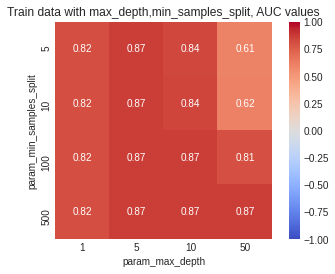

Text(0.5, 1.0, 'CV data with max_depth,min_samples_split, AUC values')

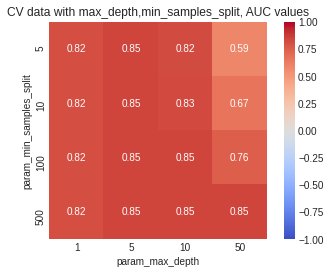

In [48]:
grid_clf_results_hm=grid_clf_results.pivot(index='param_min_samples_split',columns='param_max_depth',values='mean_test_score')
print(grid_clf_results_hm)

grid_clf_cv_results_hm=grid_clf_results_cv.pivot(index='param_min_samples_split',columns='param_max_depth',values='mean_test_score')
print(grid_clf_cv_results_hm)

ax = plt.axes()
sns.heatmap(grid_clf_results_hm,annot=True,cmap= 'coolwarm', linecolor='black',square=
True,fmt='.2g',vmin=-1, vmax=1, center= 0)
ax.set_title('Train data with max_depth,min_samples_split, AUC values')
plt.show()

ax = plt.axes()
sns.heatmap(grid_clf_cv_results_hm,annot=True,cmap= 'coolwarm', linecolor='black',square=
True,fmt='.2g',vmin=-1, vmax=1, center= 0)
ax.set_title('CV data with max_depth,min_samples_split, AUC values')
plt.show()

**Selecting the Best hyper parameters and test the performance of the model on test data, and plot the ROC Curves**

In [52]:
max_depth_best= 5
min_samples_split_best=5
print('max_depth_best:',max_depth_best)
print('min_samples_split_best:',min_samples_split_best)

max_depth_best: 5
min_samples_split_best: 5


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'AUC PLOTS for TFIDF')

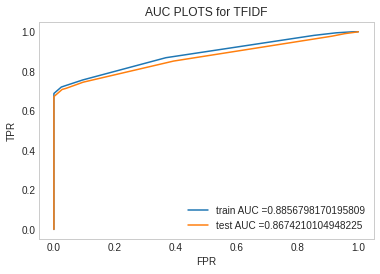

In [53]:
clf_dt= DecisionTreeClassifier(max_depth=max_depth_best,min_samples_split=min_samples_split_best)
clf_dt.fit(X_tr, y_train)
#clf_dt.fit(data, label)

y_train_pred = clf_dt.predict_proba(X_tr)[:,1]  
y_test_pred = clf_dt.predict_proba(X_te)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC PLOTS for TFIDF")
plt.grid()
plt.show()

**Selecting the threshold and predicting the probabilities, and building the Confusion Matrix for Train and Test Data**

In [54]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.7027485274770865 for threshold 0.923
Train confusion matrix
[[ 443   11]
 [1129 2906]]


(0.0, 2.0)

Text(0.5, 18.5, 'Predicted labels')

Text(36.5, 0.5, 'True labels')

Text(0.5, 1.0, 'Train Confusion Matrix')

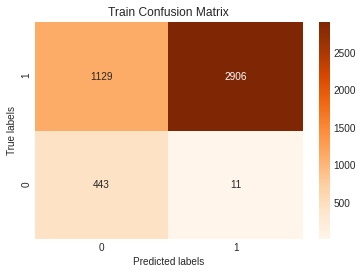

In [55]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
#print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
cm_train=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print(cm_train)

ax = plt.subplot()
sns.heatmap(cm_train,annot=True,ax=ax,fmt='g',cmap='Oranges')
ax.set_ylim([0,2])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Train Confusion Matrix')


the maximum value of tpr*(1-fpr) 0.7027485274770865 for threshold 0.923
Test confusion matrix
[[ 324    9]
 [ 866 2101]]


(0.0, 2.0)

Text(0.5, 18.5, 'Predicted labels')

Text(36.5, 0.5, 'True labels')

Text(0.5, 1.0, 'Test Confusion Matrix')

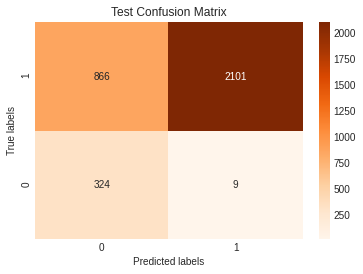

In [56]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test confusion matrix")
#print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
cm_test=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(cm_test)
ax = plt.subplot()
sns.heatmap(cm_test,annot=True,ax=ax,fmt='g',cmap='Oranges')
ax.set_ylim([0,2])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Test Confusion Matrix')


# **Applying Logistic Regression**

*Hyper Parameter Tuning with GridSearch / RandomSearchCV*

In [69]:
def hyperparam_grid_SGD_tr_2_c_val_penalty(c_val,penalty,data,label,cv,loss_func):
    in_c_val=c_val
    in_penalty=penalty
    in_data=data
    in_label=label
    in_cv=cv
    in_loss_func=loss_func
    start_time=time.time()
    clf = SGDClassifier(loss=in_loss_func)
    grid_clf=GridSearchCV(estimator=clf,param_grid={'penalty': in_penalty, 'alpha': in_c_val},scoring='roc_auc',cv=in_cv, return_train_score=False)
    grid_clf.fit(in_data, in_label)
    grid_clf_results=pd.DataFrame(grid_clf.cv_results_)
    grid_clf_results=grid_clf_results[['param_penalty','param_alpha','mean_test_score']]
    end_time=time.time()
    print(end_time-start_time)
    print(grid_clf.best_score_)
    print(grid_clf.best_params_)
    return in_c_val,in_penalty,grid_clf_results,grid_clf.best_score_,grid_clf.best_params_

In [68]:
C=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
c_val=C
penalty=['l1','l2']
loss_func='log'
cv=3
data =X_tr
label=y_train
alpha,penalty,grid_clf_results,best_score,best_params=hyperparam_grid_SGD_tr_2_c_val_penalty(c_val,penalty,data,label,cv,loss_func)
print('alpha:',alpha)
print('penalty:',penalty)
print('grid_clf_results:',grid_clf_results)
print('best_score:',best_score)
print('best_params:',best_params)

0.9423818588256836
0.8799318053127848
{'alpha': 0.01, 'penalty': 'l2'}
alpha: [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty: ['l1', 'l2']
grid_clf_results:    param_penalty param_alpha  mean_test_score
0   l1            1e-05       0.852888       
1   l2            1e-05       0.855031       
2   l1            0.0001      0.860651       
3   l2            0.0001      0.865536       
4   l1            0.001       0.878499       
5   l2            0.001       0.875650       
6   l1            0.01        0.856270       
7   l2            0.01        0.879932       
8   l1            0.1         0.808484       
9   l2            0.1         0.844419       
10  l1            1           0.500000       
11  l2            1           0.676518       
12  l1            10          0.500000       
13  l2            10          0.574322       
14  l1            100         0.500000       
15  l2            100         0.560708       
16  l1            1000        0.500000       
17

In [70]:
C=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
c_val=C
penalty=['l1','l2']
loss_func='log'
cv=3
data =X_cr
label=y_cv
alpha,penalty,grid_clf_results_cv,best_score,best_params=hyperparam_grid_SGD_tr_2_c_val_penalty(c_val,penalty,data,label,cv,loss_func)
print('alpha:',alpha)
print('penalty:',penalty)
print('grid_clf_results_cv:',grid_clf_results_cv)
print('best_score:',best_score)
print('best_params:',best_params)

0.5076868534088135
0.8668162383925669
{'alpha': 0.01, 'penalty': 'l2'}
alpha: [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty: ['l1', 'l2']
grid_clf_results_cv:    param_penalty param_alpha  mean_test_score
0   l1            1e-05       0.853754       
1   l2            1e-05       0.853204       
2   l1            0.0001      0.854790       
3   l2            0.0001      0.857056       
4   l1            0.001       0.854803       
5   l2            0.001       0.865013       
6   l1            0.01        0.856164       
7   l2            0.01        0.866816       
8   l1            0.1         0.809380       
9   l2            0.1         0.837730       
10  l1            1           0.500000       
11  l2            1           0.677697       
12  l1            10          0.500000       
13  l2            10          0.579696       
14  l1            100         0.500000       
15  l2            100         0.566673       
16  l1            1000        0.500000       

param_alpha     0.00001   0.00010   0.00100  ...  10.00000  100.00000  1000.00000
param_penalty                                ...                                 
l1             0.852888  0.860651  0.878499  ...  0.500000  0.500000   0.50000   
l2             0.855031  0.865536  0.875650  ...  0.574322  0.560708   0.55941   

[2 rows x 9 columns]
param_alpha     0.00001   0.00010   0.00100  ...  10.00000  100.00000  1000.00000
param_penalty                                ...                                 
l1             0.853754  0.854790  0.854803  ...  0.500000  0.500000   0.500000  
l2             0.853204  0.857056  0.865013  ...  0.579696  0.566673   0.565184  

[2 rows x 9 columns]


Text(0.5, 1.0, 'Train data with max_depth,min_samples_split, AUC values')

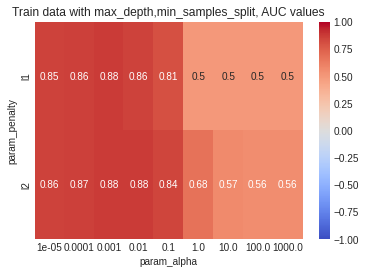

Text(0.5, 1.0, 'CV data with max_depth,min_samples_split, AUC values')

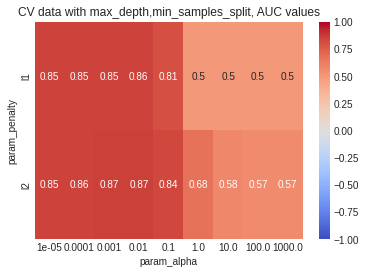

In [71]:
grid_clf_results_hm=grid_clf_results.pivot(index='param_penalty',columns='param_alpha',values='mean_test_score')
print(grid_clf_results_hm)

grid_clf_cv_results_hm=grid_clf_results_cv.pivot(index='param_penalty',columns='param_alpha',values='mean_test_score')
print(grid_clf_cv_results_hm)

ax = plt.axes()
sns.heatmap(grid_clf_results_hm,annot=True,cmap= 'coolwarm', linecolor='black',square=
False,fmt='.2g',vmin=-1, vmax=1, center= 0)
ax.set_title('Train data with max_depth,min_samples_split, AUC values')
plt.show()

ax = plt.axes()
sns.heatmap(grid_clf_cv_results_hm,annot=True,cmap= 'coolwarm', linecolor='black',square=
False,fmt='.2g',vmin=-1, vmax=1, center= 0)
ax.set_title('CV data with max_depth,min_samples_split, AUC values')
plt.show()

**Testing the performance of the model (Log. Reg) on test data, plotting ROC Curves using best hyper param : penalty and alpha values**

In [79]:
penalty='l2'
alpha=0.01

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=1000, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=0, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'AUC PLOTS for TFIDF for Non-Zero Features')

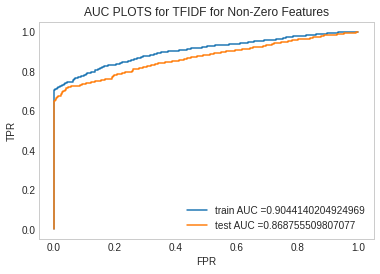

In [81]:
y_train_pred=[]
y_test_pred=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
tr_thresholds=[]
te_thresholds=[]
clf_lr = SGDClassifier(loss='log',penalty='l2',alpha=0.01,eta0=0.0001,learning_rate='constant',random_state=0, n_iter_no_change=1000)
clf_lr.fit(X_tr, y_train)
y_train_pred = clf_lr.predict_proba(X_tr)[:,1]  
y_test_pred = clf_lr.predict_proba(X_te)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC PLOTS for TFIDF for Non-Zero Features")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.7146619065555245 for threshold 0.828
Train confusion matrix
[[ 438   16]
 [1046 2989]]


(0.0, 2.0)

Text(0.5, 18.5, 'Predicted labels')

Text(36.5, 0.5, 'True labels')

Text(0.5, 1.0, 'Train Confusion Matrix')

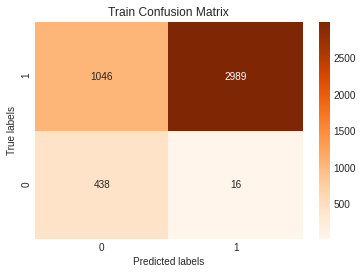

In [77]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
#print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
cm_train=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print(cm_train)

ax = plt.subplot()
sns.heatmap(cm_train,annot=True,ax=ax,fmt='g',cmap='Oranges')
ax.set_ylim([0,2])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Train Confusion Matrix')


the maximum value of tpr*(1-fpr) 0.7146619065555245 for threshold 0.828
Test confusion matrix
[[ 317   16]
 [ 829 2138]]


(0.0, 2.0)

Text(0.5, 18.5, 'Predicted labels')

Text(36.5, 0.5, 'True labels')

Text(0.5, 1.0, 'Test Confusion Matrix')

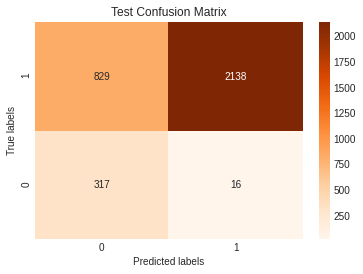

In [78]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test confusion matrix")
#print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
cm_test=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(cm_test)
ax = plt.subplot()
sns.heatmap(cm_test,annot=True,ax=ax,fmt='g',cmap='Oranges')
ax.set_ylim([0,2])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Test Confusion Matrix')


# **Appying SVM on the data set**

*Hyper Parameter Tuning with GridSearch / RandomSearchCV*

In [82]:
C=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
c_val=C
penalty=['l1','l2']
loss_func='hinge'
cv=3
data =X_tr
label=y_train
alpha,penalty,grid_clf_results,best_score,best_params=hyperparam_grid_SGD_tr_2_c_val_penalty(c_val,penalty,data,label,cv,loss_func)
print('alpha:',alpha)
print('penalty:',penalty)
print('grid_clf_results:',grid_clf_results)
print('best_score:',best_score)
print('best_params:',best_params)

0.8611767292022705
0.8659195549744892
{'alpha': 0.001, 'penalty': 'l2'}
alpha: [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty: ['l1', 'l2']
grid_clf_results:    param_penalty param_alpha  mean_test_score
0   l1            1e-06       0.851402       
1   l2            1e-06       0.854633       
2   l1            1e-05       0.855039       
3   l2            1e-05       0.850544       
4   l1            0.0001      0.859971       
5   l2            0.0001      0.861069       
6   l1            0.001       0.863595       
7   l2            0.001       0.865920       
8   l1            0.01        0.839902       
9   l2            0.01        0.859764       
10  l1            0.1         0.709722       
11  l2            0.1         0.822857       
12  l1            1           0.500000       
13  l2            1           0.653074       
14  l1            10          0.500000       
15  l2            10          0.559162       
16  l1            100         0.500000  

In [83]:
C=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
c_val=C
penalty=['l1','l2']
loss_func='hinge'
cv=3
data =X_cr
label=y_cv
alpha,penalty,grid_clf_results_cv,best_score,best_params=hyperparam_grid_SGD_tr_2_c_val_penalty(c_val,penalty,data,label,cv,loss_func)
print('alpha:',alpha)
print('penalty:',penalty)
print('grid_clf_results_cv:',grid_clf_results_cv)
print('best_score:',best_score)
print('best_params:',best_params)

0.46196842193603516
0.8581706366316283
{'alpha': 1e-05, 'penalty': 'l1'}
alpha: [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty: ['l1', 'l2']
grid_clf_results_cv:    param_penalty param_alpha  mean_test_score
0   l1            1e-06       0.854312       
1   l2            1e-06       0.855290       
2   l1            1e-05       0.858171       
3   l2            1e-05       0.851667       
4   l1            0.0001      0.854324       
5   l2            0.0001      0.850914       
6   l1            0.001       0.851762       
7   l2            0.001       0.853537       
8   l1            0.01        0.838993       
9   l2            0.01        0.845281       
10  l1            0.1         0.708500       
11  l2            0.1         0.811357       
12  l1            1           0.500000       
13  l2            1           0.648518       
14  l1            10          0.500000       
15  l2            10          0.565036       
16  l1            100         0.5000

param_alpha    0.000001  0.000010  0.000100  ...  10.000000  100.000000  1000.000000
param_penalty                                ...                                    
l1             0.851402  0.855039  0.859971  ...  0.500000   0.500000    0.500000   
l2             0.854633  0.850544  0.861069  ...  0.559162   0.559183    0.559186   

[2 rows x 10 columns]
param_alpha    0.000001  0.000010  0.000100  ...  10.000000  100.000000  1000.000000
param_penalty                                ...                                    
l1             0.854312  0.858171  0.854324  ...  0.500000   0.500000    0.500000   
l2             0.855290  0.851667  0.850914  ...  0.565036   0.565063    0.564989   

[2 rows x 10 columns]


Text(0.5, 1.0, 'Train data with max_depth,min_samples_split, AUC values')

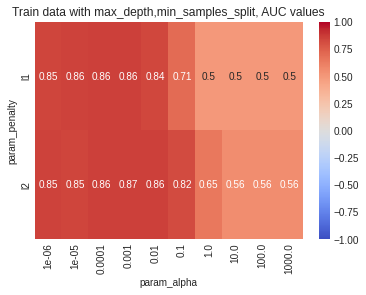

Text(0.5, 1.0, 'CV data with max_depth,min_samples_split, AUC values')

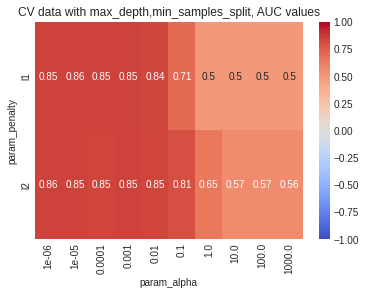

In [84]:
grid_clf_results_hm=grid_clf_results.pivot(index='param_penalty',columns='param_alpha',values='mean_test_score')
print(grid_clf_results_hm)

grid_clf_cv_results_hm=grid_clf_results_cv.pivot(index='param_penalty',columns='param_alpha',values='mean_test_score')
print(grid_clf_cv_results_hm)

ax = plt.axes()
sns.heatmap(grid_clf_results_hm,annot=True,cmap= 'coolwarm', linecolor='black',square=
False,fmt='.2g',vmin=-1, vmax=1, center= 0)
ax.set_title('Train data with max_depth,min_samples_split, AUC values')
plt.show()

ax = plt.axes()
sns.heatmap(grid_clf_cv_results_hm,annot=True,cmap= 'coolwarm', linecolor='black',square=
False,fmt='.2g',vmin=-1, vmax=1, center= 0)
ax.set_title('CV data with max_depth,min_samples_split, AUC values')
plt.show()

**Testing the performance of the model (SVM) on test data, plotting ROC Curves using best hyper param : penalty and alpha values**

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0001,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='constant',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=1000,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5, random_state=0,
                                                    shuffle=True, tol=0.001,
                                                    validation_fraction=0.1,
          

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'AUC PLOTS for TFIDF - SVM for Non-Zero Features')

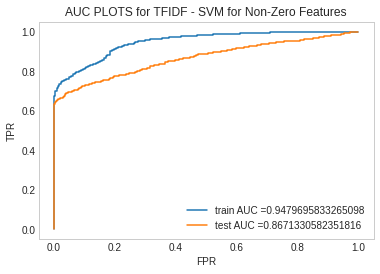

In [85]:
y_train_pred=[]
y_test_pred=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
tr_thresholds=[]
te_thresholds=[]
base_model = SGDClassifier(loss='hinge',penalty='l2',alpha=0.001,eta0=0.0001,learning_rate='constant',random_state=0, n_iter_no_change=1000)
clf_svm = CalibratedClassifierCV(base_model)
clf_svm.fit(X_tr, y_train)
y_train_pred = clf_svm.predict_proba(X_tr)[:,1]  
y_test_pred = clf_svm.predict_proba(X_te)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC PLOTS for TFIDF - SVM for Non-Zero Features")
plt.grid()
plt.show()

Selecting the threshold and predicting the probabilities, and building the Confusion Matrix for Train and Test Data

the maximum value of tpr*(1-fpr) 0.7366108227022365 for threshold 0.796
Train confusion matrix
[[ 370   84]
 [ 388 3647]]


(0.0, 2.0)

Text(0.5, 18.5, 'Predicted labels')

Text(36.5, 0.5, 'True labels')

Text(0.5, 1.0, 'Train Confusion Matrix')

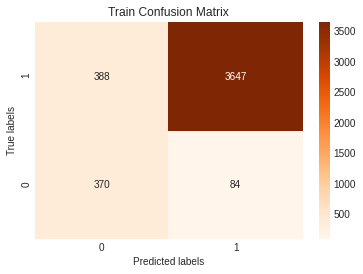

In [86]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
#print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
cm_train=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print(cm_train)

ax = plt.subplot()
sns.heatmap(cm_train,annot=True,ax=ax,fmt='g',cmap='Oranges')
ax.set_ylim([0,2])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Train Confusion Matrix')


the maximum value of tpr*(1-fpr) 0.7366108227022365 for threshold 0.796
Test confusion matrix
[[ 211  122]
 [ 457 2510]]


(0.0, 2.0)

Text(0.5, 18.5, 'Predicted labels')

Text(36.5, 0.5, 'True labels')

Text(0.5, 1.0, 'Test Confusion Matrix')

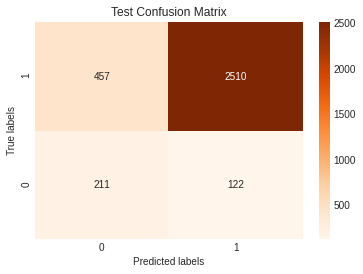

In [87]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test confusion matrix")
#print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
cm_test=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(cm_test)
ax = plt.subplot()
sns.heatmap(cm_test,annot=True,ax=ax,fmt='g',cmap='Oranges')
ax.set_ylim([0,2])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Test Confusion Matrix')


In [88]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Hyper Parameter1","Hyper Parameter2","Train AUC","Test AUC"]
x.add_row(["Decision Trees", 'max_depth: 5', 'min_samples_split: 5', 0.885,0.867])
x.add_row(["Logistic Regression", 'penalty: l2', 'alpha: 0.01', 0.904,0.868])
x.add_row(["SVM", 'penalty: l2', 'alpha: 0.001', 0.947,0.867])
print(x)

+---------------------+------------------+----------------------+-----------+----------+
|        Model        | Hyper Parameter1 |   Hyper Parameter2   | Train AUC | Test AUC |
+---------------------+------------------+----------------------+-----------+----------+
|    Decision Trees   |   max_depth: 5   | min_samples_split: 5 |   0.885   |  0.867   |
| Logistic Regression |   penalty: l2    |     alpha: 0.01      |   0.904   |  0.868   |
|         SVM         |   penalty: l2    |     alpha: 0.001     |   0.947   |  0.867   |
+---------------------+------------------+----------------------+-----------+----------+
